In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #This is to bypass all the unnecessary error warnings

df=pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


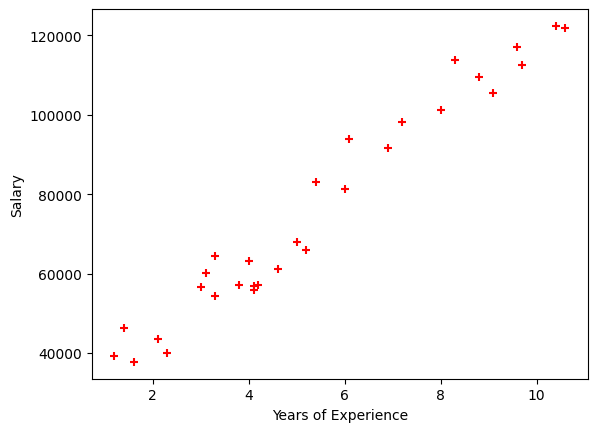

In [10]:
plt.scatter(df.YearsExperience, df.Salary, color="red", marker='+')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]
train.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


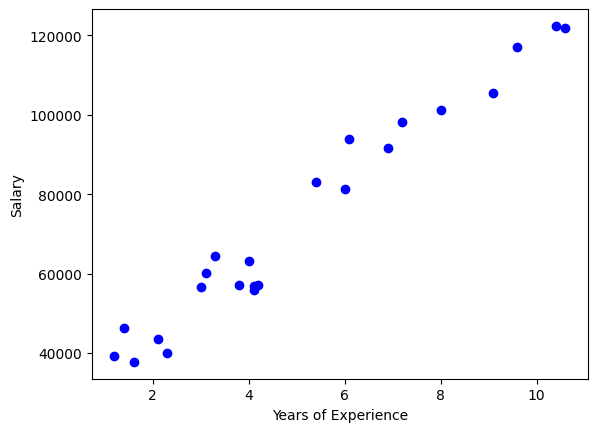

In [16]:
plt.scatter(train.YearsExperience, train.Salary, color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
train_X=np.asanyarray(train[['YearsExperience']])
train_Y=np.asanyarray(train[['Salary']])

regr.fit(train_X,train_Y)


LinearRegression()

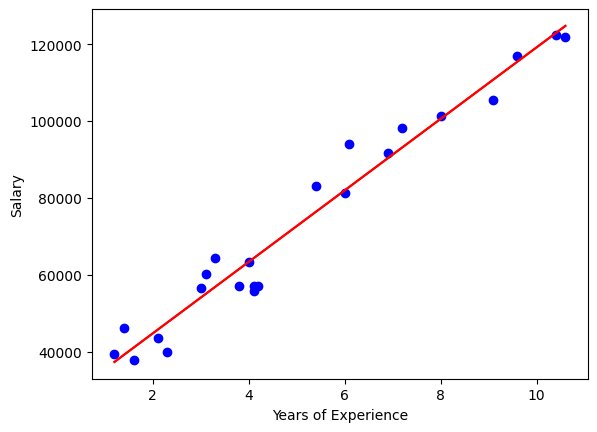

In [26]:
plt.scatter(train.YearsExperience, train.Salary, color="blue")
#automate
plt.plot(train_X, regr.predict(train_X),'-r')
#manual
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0],'-r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [37]:
test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regr.predict(test_x)
test_y_
test

,YearsExperience,Salary
7,3.3,54446.0
14,4.6,61112.0
15,5.0,67939.0
16,5.2,66030.0
23,8.3,113813.0
24,8.8,109432.0
27,9.7,112636.0


In [35]:
en=test.copy()
en['Salary']=test_y_
en

,YearsExperience,Salary
7,3.3,56854.039864
14,4.6,68949.948712
15,5.0,72671.766819
16,5.2,74532.675872
23,8.3,103376.766201
24,8.8,108029.038835
27,9.7,116403.129575


In [38]:
# MAE
# MSE
# RMSE
# R^2

In [47]:
# calculate the accuracy of regression model

from sklearn.metrics import r2_score

print("Mean Absolute Error %.2f"% np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("r2-score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error 5583.97
Residual sum of squares (MSE): 41000173.70
r2-score: 0.93


In [51]:
data=[[9]]
d=pd.DataFrame(data,columns=['YearsExperience'])
d
te=np.asanyarray(d[['YearsExperience']])
re=regr.predict(te)
re

array([[109889.94788808]])